In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Datasets/updated_mastitis_dataset.csv")

In [ ]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.columns)

0
Index(['Cow ID', 'Milk Yield (L/Day)', 'SCC (cells/mL)', 'Lactation Stage',
       'Temperature (°C)', 'Udder Health Metrics', 'Historical Mastitis Cases',
       'Protein Level (%)', 'Mastitis Presence', 'Mastitis Type'],
      dtype='object')


In [ ]:
mastitis_count = df[df['Mastitis Presence'] == 'Yes'].shape[0]
print(f"Number of cows with mastitis: {mastitis_count}")

Number of cows with mastitis: 803


In [ ]:
avg_yield_mastitis = df[df['Mastitis Presence'] == 'Yes']['Milk Yield (L/Day)'].mean()
avg_yield_no_mastitis = df[df['Mastitis Presence'] == 'No']['Milk Yield (L/Day)'].mean()
print(f"Average milk yield with mastitis: {avg_yield_mastitis}")
print(f"Average milk yield without mastitis: {avg_yield_no_mastitis}")

Average milk yield with mastitis: 26.199202988792027
Average milk yield without mastitis: 25.157804878048783


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

print("Unique values in Lactation Stage:", df['Lactation Stage'].unique())
print("Unique values in Udder Health Metrics:", df['Udder Health Metrics'].unique())
print("Unique values in Mastitis Presence:", df['Mastitis Presence'].unique())
print("Unique values in Mastitis Type:", df['Mastitis Type'].unique())

Missing Values:
 Cow ID                         0
Milk Yield (L/Day)             0
SCC (cells/mL)                 0
Lactation Stage                0
Temperature (°C)               0
Udder Health Metrics           0
Historical Mastitis Cases      0
Protein Level (%)              0
Mastitis Presence              0
Mastitis Type                697
dtype: int64
Number of duplicate rows: 0
Unique values in Lactation Stage: ['Mid' 'Early' 'Peak' 'Late']
Unique values in Udder Health Metrics: ['Hardness' 'Normal' 'Swollen' 'Lesions' 'Slight Redness']
Unique values in Mastitis Presence: ['No' 'Yes']
Unique values in Mastitis Type: [nan 'Clinical' 'Subclinical']


Mastitis Presence:
 Mastitis Presence
Yes    803
No     697
Name: count, dtype: int64


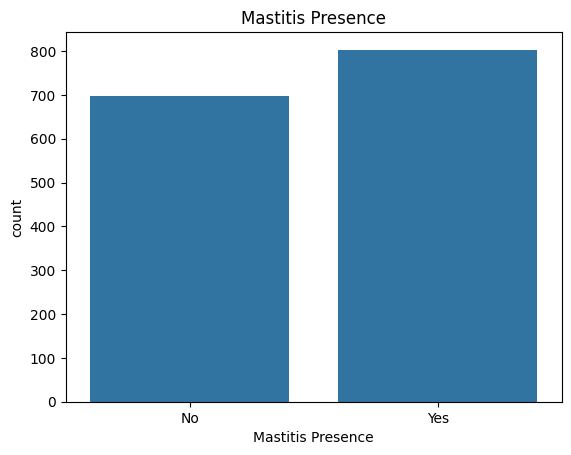

In [ ]:
mastitis_count = df['Mastitis Presence'].value_counts()
print("Mastitis Presence:\n", mastitis_count)

sns.countplot(x='Mastitis Presence', data=df)
plt.title("Mastitis Presence")
plt.show()

Average milk yield with mastitis: 26.20 L/Day
Average milk yield without mastitis: 25.16 L/Day


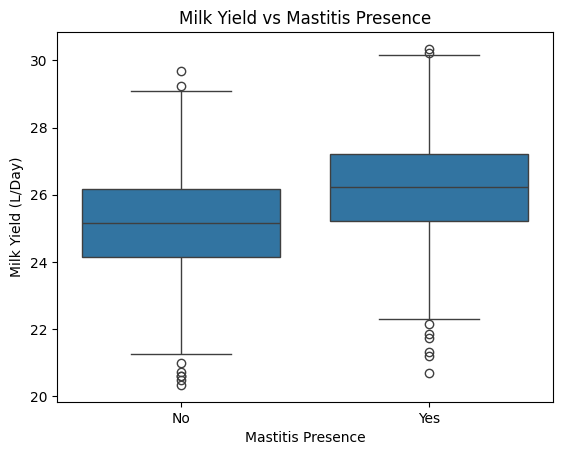

In [ ]:
avg_yield_mastitis = df[df['Mastitis Presence'] == 'Yes']['Milk Yield (L/Day)'].mean()
avg_yield_no_mastitis = df[df['Mastitis Presence'] == 'No']['Milk Yield (L/Day)'].mean()

print(f"Average milk yield with mastitis: {avg_yield_mastitis:.2f} L/Day")
print(f"Average milk yield without mastitis: {avg_yield_no_mastitis:.2f} L/Day")

sns.boxplot(x='Mastitis Presence', y='Milk Yield (L/Day)', data=df)
plt.title("Milk Yield vs Mastitis Presence")
plt.show()

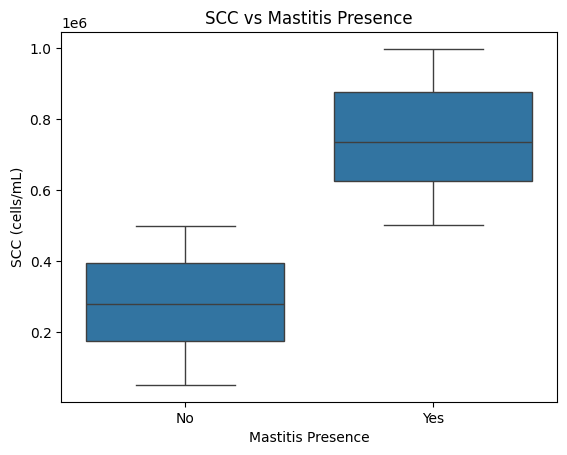

In [ ]:
sns.boxplot(x='Mastitis Presence', y='SCC (cells/mL)', data=df)
plt.title("SCC vs Mastitis Presence")
plt.show()

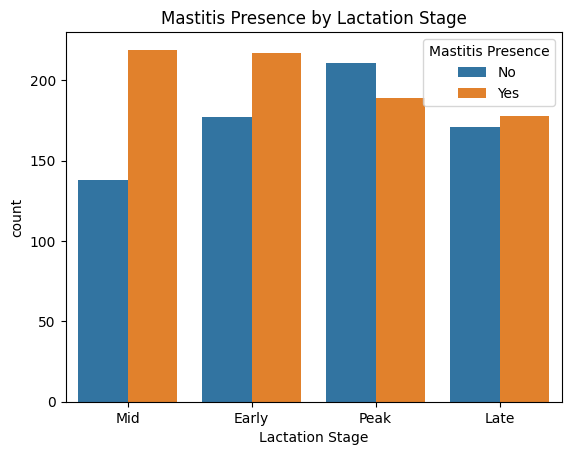

In [ ]:
sns.countplot(x='Lactation Stage', hue='Mastitis Presence', data=df)
plt.title("Mastitis Presence by Lactation Stage")
plt.show()

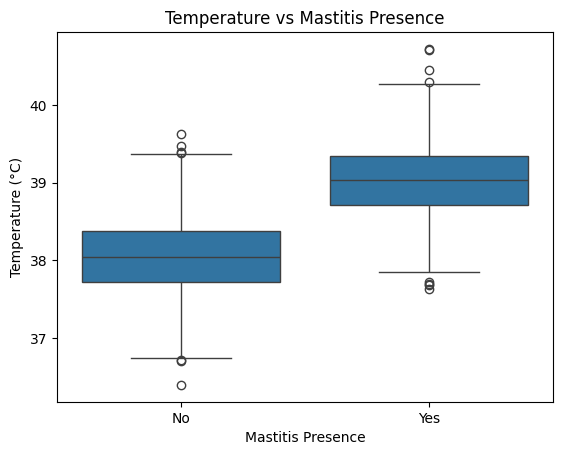

In [ ]:
sns.boxplot(x='Mastitis Presence', y='Temperature (°C)', data=df)
plt.title("Temperature vs Mastitis Presence")
plt.show()

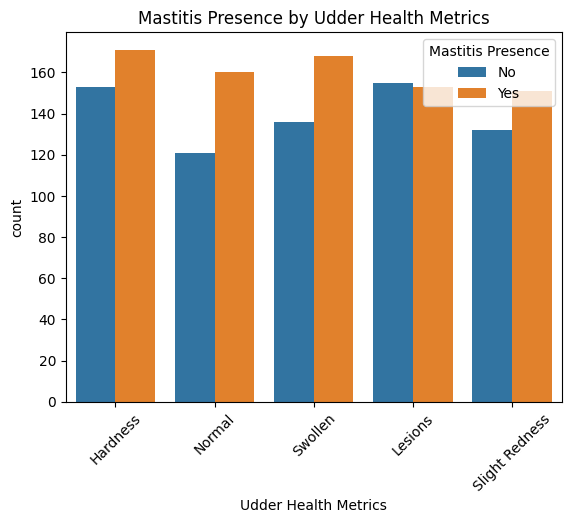

In [ ]:
sns.countplot(x='Udder Health Metrics', hue='Mastitis Presence', data=df)
plt.title("Mastitis Presence by Udder Health Metrics")
plt.xticks(rotation=45)
plt.show()

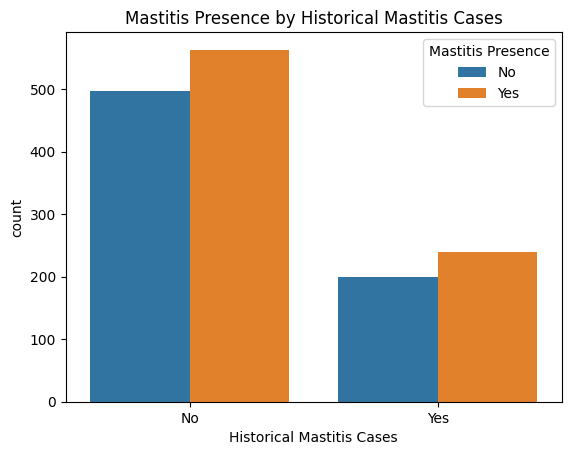

In [ ]:
sns.countplot(x='Historical Mastitis Cases', hue='Mastitis Presence', data=df)
plt.title("Mastitis Presence by Historical Mastitis Cases")
plt.show()

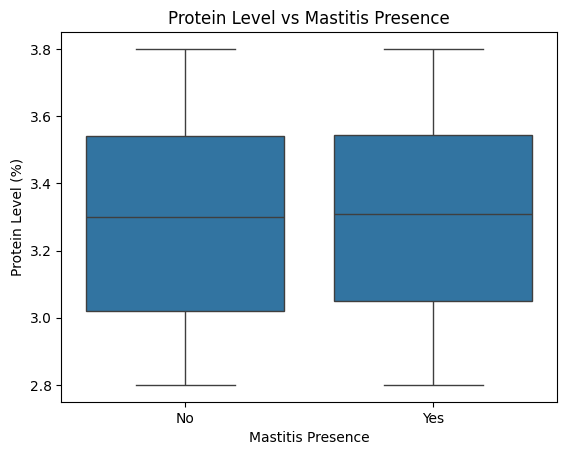

In [ ]:
sns.boxplot(x='Mastitis Presence', y='Protein Level (%)', data=df)
plt.title("Protein Level vs Mastitis Presence")
plt.show()

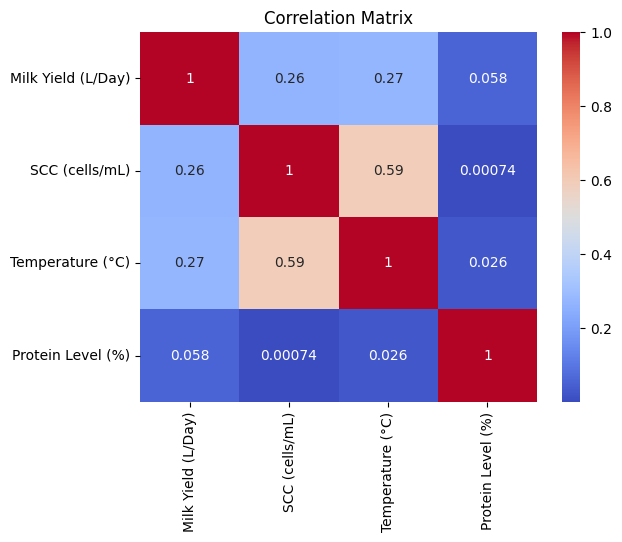

In [ ]:
numerical_columns = ['Milk Yield (L/Day)', 'SCC (cells/mL)', 'Temperature (°C)', 'Protein Level (%)']
correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Lactation Stage', 'Udder Health Metrics', 'Historical Mastitis Cases', 'Mastitis Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Cow ID', 'Mastitis Presence'])
y = df['Mastitis Presence']
y = LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1200, 8)
Testing set size: (300, 8)


In [ ]:
# Data Diagnostic Check
print("\n=== Data Diagnostic ===")
print(f"Dataset shape: {df.shape}")
print(f"Class distribution:\n{df['Mastitis Presence'].value_counts()}")
print("\nFeature distributions:")
print(df.describe())

# Check for data leakage
if df.duplicated().sum() > 0:
    print(f"\nWarning: {df.duplicated().sum()} duplicates found!")
else:
    print("\nNo duplicates found")

# Check for constant features
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
if constant_cols:
    print(f"\nWarning: Constant features found - {constant_cols}")
else:
    print("\nNo constant features found")


=== Data Diagnostic ===
Dataset shape: (1500, 10)
Class distribution:
Mastitis Presence
Yes    803
No     697
Name: count, dtype: int64

Feature distributions:
            Cow ID  Milk Yield (L/Day)  SCC (cells/mL)  Lactation Stage  \
count  1500.000000         1500.000000     1500.000000      1500.000000   
mean   1750.500000           25.715300   531177.324000         1.508667   
std     433.157015            1.628543   269643.808695         1.144318   
min    1001.000000           20.340000    50883.000000         0.000000   
25%    1375.750000           24.667500   294969.750000         0.000000   
50%    1750.500000           25.705000   533507.500000         2.000000   
75%    2125.250000           26.860000   753233.750000         3.000000   
max    2500.000000           30.340000   998385.000000         3.000000   

       Temperature (°C)  Udder Health Metrics  Historical Mastitis Cases  \
count       1500.000000           1500.000000                1500.000000   
mean       

In [ ]:
# 1. Check for duplicate rows between train and test
train_test_duplicates = pd.concat([X_train, X_test]).duplicated().sum()
print(f"Duplicate rows between train and test: {train_test_duplicates}")

# 2. Check feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("\nFeature importances:")
for name, importance in zip(X.columns, rf.feature_importances_):
    print(f"{name}: {importance:.4f}")

# 3. Check single feature predictive power
from sklearn.metrics import accuracy_score
print("\nSingle feature predictive power:")
for feature in X.columns:
    model = RandomForestClassifier(max_depth=1)
    model.fit(X_train[[feature]], y_train)
    acc = accuracy_score(y_test, model.predict(X_test[[feature]]))
    print(f"{feature}: {acc:.4f}")

Duplicate rows between train and test: 0

Feature importances:
Milk Yield (L/Day): 0.0198
SCC (cells/mL): 0.4314
Lactation Stage: 0.0012
Temperature (°C): 0.1615
Udder Health Metrics: 0.0009
Historical Mastitis Cases: 0.0002
Protein Level (%): 0.0040
Mastitis Type: 0.3811

Single feature predictive power:
Milk Yield (L/Day): 0.6467
SCC (cells/mL): 1.0000
Lactation Stage: 0.5467
Temperature (°C): 0.8167
Udder Health Metrics: 0.5200
Historical Mastitis Cases: 0.5200
Protein Level (%): 0.5133
Mastitis Type: 1.0000


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

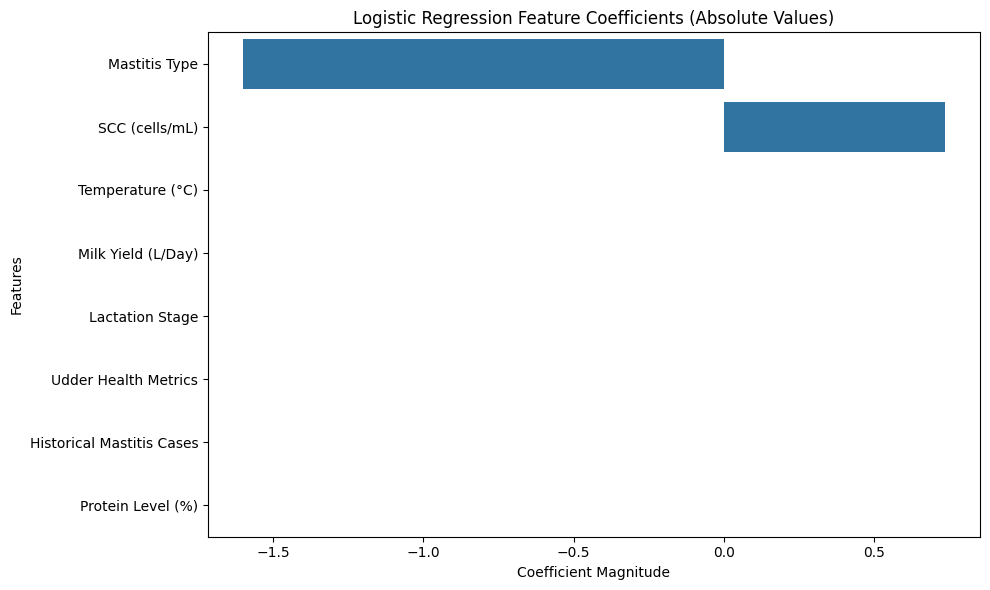


=== Logistic Regression ===
Accuracy: 1.0000
Top 5 Features:
              Feature  Coefficient
7       Mastitis Type    -1.599625
1      SCC (cells/mL)     0.734473
3    Temperature (°C)     0.000302
0  Milk Yield (L/Day)     0.000000
2     Lactation Stage     0.000000


In [ ]:
# Logistic Regression Module with Coefficients
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Preprocessing
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# Model training
lr = LogisticRegression(penalty='l1', solver='saga', C=0.01, max_iter=1000, random_state=42)
lr.fit(X_train_lr_scaled, y_train_lr)

# Evaluation
y_pred_lr = lr.predict(X_test_lr_scaled)
lr_acc = accuracy_score(y_test_lr, y_pred_lr)

# Coefficients analysis
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Logistic Regression Feature Coefficients (Absolute Values)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

print("\n=== Logistic Regression ===")
print(f"Accuracy: {lr_acc:.4f}")
print("Top 5 Features:")
print(coef_df.head(5))

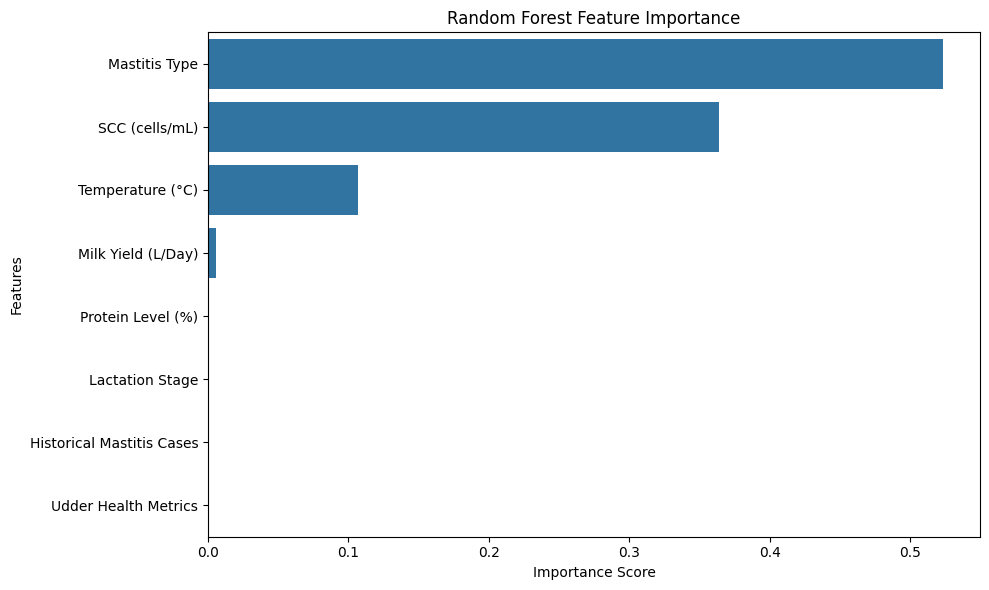


=== Random Forest ===
Accuracy: 1.0000
Top 5 Important Features:
              Feature  Importance
7       Mastitis Type    0.523545
1      SCC (cells/mL)    0.363635
3    Temperature (°C)    0.106996
0  Milk Yield (L/Day)    0.005533
6   Protein Level (%)    0.000291


In [ ]:
# Random Forest Module with Feature Importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.25, random_state=7, stratify=y)

# Model training
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=3,
    max_features=0.5,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train_rf, y_train_rf)

# Evaluation
y_pred_rf = rf.predict(X_test_rf)
rf_acc = accuracy_score(y_test_rf, y_pred_rf)

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

print("\n=== Random Forest ===")
print(f"Accuracy: {rf_acc:.4f}")
print("Top 5 Important Features:")
print(feature_importance_df.head(5))

In [ ]:
# SVM Module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Prepare data specifically for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X, y, test_size=0.2, random_state=13, stratify=y)

# Preprocessing
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train_svm)
X_test_svm_scaled = scaler_svm.transform(X_test_svm)

# Model training
svm = SVC(kernel='poly', degree=2, C=0.1, random_state=42)
svm.fit(X_train_svm_scaled, y_train_svm)

# Prediction and evaluation
y_pred_svm = svm.predict(X_test_svm_scaled)
svm_acc = accuracy_score(y_test_svm, y_pred_svm)

# Results
print("\n=== SVM ===")
print(f"Accuracy: {svm_acc:.4f}")
print("Support vectors:", svm.support_vectors_.shape)


=== SVM ===
Accuracy: 0.5500
Support vectors: (1114, 8)


In [ ]:
# KNN Module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare data (using same split as Logistic Regression)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Preprocessing (using same scaler as Logistic Regression)
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# Model training
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_lr_scaled, y_train_lr)

# Prediction and evaluation
y_pred_knn = knn.predict(X_test_lr_scaled)
knn_acc = accuracy_score(y_test_lr, y_pred_knn)

# Results
print("\n=== KNN ===")
print(f"Accuracy: {knn_acc:.4f}")


=== KNN ===
Accuracy: 0.9978


In [ ]:
# Neural Network Module
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Prepare data (using same split as Random Forest)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.25, random_state=7, stratify=y)

# Model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model training
model.fit(X_train_rf, y_train_rf,
          epochs=30,
          batch_size=16,
          verbose=0)

# Prediction and evaluation
y_pred_nn = (model.predict(X_test_rf) > 0.5).astype(int)
nn_acc = accuracy_score(y_test_rf, y_pred_nn)

# Results
print("\n=== Neural Network ===")
print(f"Accuracy: {nn_acc:.4f}")
print("Model summary:")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

=== Neural Network ===
Accuracy: 0.4640
Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Prepare Data with proper stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Remove problematic features (shown in importance analysis)
X_train = X_train.drop(columns=['Mastitis Type', 'SCC (cells/mL)'])
X_test = X_test.drop(columns=['Mastitis Type', 'SCC (cells/mL)'])

# 3. Initialize Model with strong regularization
xgb = XGBClassifier(
    learning_rate=0.01,  # Very low learning rate
    n_estimators=100,
    max_depth=1,         # Stumps only
    subsample=0.5,       # Use only 50% of samples
    colsample_bytree=0.5, # Use only 50% of features
    reg_alpha=1.0,       # Strong L1 regularization
    reg_lambda=1.0,      # Strong L2 regularization
    random_state=42,
    eval_metric='logloss',
    # Disable deprecated parameter warning:
    use_label_encoder=False
)

# 4. Train with evaluation
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train,
        eval_set=eval_set,
        verbose=10)

# 5. Evaluate
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nXGBoost Accuracy: {acc:.4f}")

# 6. Feature Importance for remaining features
print("\nFeature Importances:")
importance = xgb.feature_importances_
for i, (name, score) in enumerate(zip(X_train.columns, importance)):
    print(f"{i+1}. {name}: {score:.4f}")

[0]	validation_0-logloss:0.69064	validation_1-logloss:0.69063
[10]	validation_0-logloss:0.65457	validation_1-logloss:0.65443
[20]	validation_0-logloss:0.62985	validation_1-logloss:0.62951
[30]	validation_0-logloss:0.60789	validation_1-logloss:0.60742
[40]	validation_0-logloss:0.59166	validation_1-logloss:0.59106
[50]	validation_0-logloss:0.57599	validation_1-logloss:0.57503
[60]	validation_0-logloss:0.56077	validation_1-logloss:0.55978
[70]	validation_0-logloss:0.55398	validation_1-logloss:0.55250
[80]	validation_0-logloss:0.54547	validation_1-logloss:0.54362
[90]	validation_0-logloss:0.53110	validation_1-logloss:0.52864
[99]	validation_0-logloss:0.51714	validation_1-logloss:0.51462

XGBoost Accuracy: 0.8422

Feature Importances:
1. Milk Yield (L/Day): 0.1418
2. Lactation Stage: 0.0156
3. Temperature (°C): 0.8143
4. Udder Health Metrics: 0.0110
5. Historical Mastitis Cases: 0.0093
6. Protein Level (%): 0.0079


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:12:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM',
              'KNN', 'XGBoost', 'Neural Network'],
    'Accuracy': [lr_acc, rf_acc, svm_acc,
                 knn_acc, acc, nn_acc]
})

print("\n=== Final Model Comparison ===")
print(results.sort_values('Accuracy', ascending=False))


=== Final Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  1.000000
1        Random Forest  1.000000
3                  KNN  0.997778
4              XGBoost  0.842222
2                  SVM  0.550000
5       Neural Network  0.464000
